<a href="https://colab.research.google.com/github/idrissdeme/Exerc-cos_Python_UERJ_202/blob/main/TCC_Espectrometria_de_netron_Sinal_neutron__MLP_SUCCESS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

** MLP LEARNING NEUTRON SIGNAL **




In [26]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
#from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import*

**Define the network hyperparameters**

In [27]:
# Trainign batch size 
batch_size = 1
# Number of training epochs
epochs = 50
# Fraction of the training data to be used as validation
val_split = 0.3
# Number of classes ( multi-classification )
nb_classes = 84
# Learning rate
learning_rate=0.02

Usando arquivo teste

In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
#!pip install xlrd
df= pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Dados_rede_MLP_Neutron.xlsx")
#df= pd.read_excel("/content/Dados_rede_MLP_Neutron.xlsx")
#pd.read_excel('/BASE de Teste_e_Treinamen 5.xls', engine='openpyxl')
df= df.drop(columns=["Unnamed: 0"])
#df = df.dropna()
df

,Entradas,Entradas.1,Entradas.2,Entradas.3,Entradas.4,Entradas.5,Entradas.6,Saidas,Saidas.1,Saidas.2,...,Saidas.74,Saidas.75,Saidas.76,Saidas.77,Saidas.78,Saidas.79,Saidas.80,Saidas.81,Saidas.82,Saidas.83
0,0.543861,0.201325,0.149053,0.074173,0.021294,0.002667,1,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.538087,0.201298,0.152657,0.075576,0.020753,0.003106,2,0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.525730,0.205376,0.158838,0.076627,0.021271,0.003076,3,0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.512739,0.207309,0.165742,0.079946,0.022347,0.003031,4,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.493597,0.218463,0.168312,0.083218,0.023865,0.003147,5,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,0.000077,0.001875,0.015979,0.108308,0.260462,0.313583,80,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
282,0.000068,0.001338,0.012946,0.093419,0.250006,0.327649,81,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
283,0.000063,0.001329,0.011869,0.088642,0.248518,0.347401,82,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
284,0.000055,0.001247,0.011018,0.086745,0.244663,0.342767,83,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.iloc[0:286, 0:7], df.iloc[0:286, 7:91], test_size=0.3, random_state=42)
X_train = X_train.astype('float')
X_test = X_test.astype('float32')
#X_train = X_train.reshape(60000, 286)
#X_test = X_test.reshape(10000, 286)
#print(X_train)
#print(y_train)
#print(X_test)

In [31]:
# Load MNIST dataset (28x28 pixel images)
#(X_train, y_train), (X_test, y_test) = df()
"""X_train = X_train.values.reshape(100,14)
X_test = X_test.values.reshape(2,301)
X_train = X_train.astype('double')
X_test = X_test.astype('double')
#X_train /= 255
X_test /= 255
Y_Train = y_train/10.
print(y_test)
Y_Test = y_test/10.
#print(Y_Test)"""


x_train: (1,7*286)
y_train: (1,84*286)
#Y_Train = y_train/84.
x_test: (1,7*286)
y_test: (1,84*286)


#X_train = X_train.values.reshape(X_train.shape[0], len(X_train))
#X_test = X_test.reshape(X_test.shape[0], len(X_test))


#Y_Test = y_test/84.

**Define the MLP achitecture using KERAS sequential API**

In [32]:
# Multilayer Perceptron model
model = Sequential()
model.add(Dense(input_dim=7, activation="relu", units=7, kernel_initializer="normal"))
model.add(Dense(activation="relu", units=84, kernel_initializer="normal")) # after first layer no need to specify input_dim
model.add(Dense(activation="relu", units=84, kernel_initializer="normal")) # after first layer no need to specify input_dim
model.add(Dense(activation="relu", units=84, kernel_initializer="normal"))
model.add(Dense(activation="relu", units=84, kernel_initializer="normal"))#model.add(Dense(activation="relu", units=63, kernel_initializer="normal"))
model.add(Dense(activation="relu", units=84, kernel_initializer="normal"))
model.add(Dense(activation="relu", units=84, kernel_initializer="normal"))
model.compile(optimizer=SGD(learning_rate=learning_rate), loss='mean_squared_error', metrics=['accuracy'])
#model.compile(optimizer=SGD(learning_rate=learning_rate), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 7)                 56        
                                                                 
 dense_15 (Dense)            (None, 84)                672       
                                                                 
 dense_16 (Dense)            (None, 84)                7140      
                                                                 
 dense_17 (Dense)            (None, 84)                7140      
                                                                 
 dense_18 (Dense)            (None, 84)                7140      
                                                                 
 dense_19 (Dense)            (None, 84)                7140      
                                                                 
 dense_20 (Dense)            (None, 84)               

**Train the MLP**

In [33]:
"""X_train
X = np.array(X_train)
len(X)"""

'X_train\nX = np.array(X_train)\nlen(X)'

In [34]:
# Train
#y=np.array(y_train)
history = model.fit(X_train, y_train, validation_split=val_split, epochs=epochs, batch_size=batch_size, verbose=1)
#history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1)

Epoch 1/50
140/140 [==============================] - 1s 2ms/step - loss: 0.0987 - accuracy: 0.0143 - val_loss: 0.0891 - val_accuracy: 0.0000e+00
Epoch 2/50
140/140 [==============================] - 0s 2ms/step - loss: 0.0956 - accuracy: 0.0357 - val_loss: 0.0866 - val_accuracy: 0.0000e+00
Epoch 3/50
140/140 [==============================] - 0s 1ms/step - loss: 0.0929 - accuracy: 0.0286 - val_loss: 0.0844 - val_accuracy: 0.0000e+00
Epoch 4/50
140/140 [==============================] - 0s 2ms/step - loss: 0.0904 - accuracy: 0.0286 - val_loss: 0.0825 - val_accuracy: 0.0000e+00
Epoch 5/50
140/140 [==============================] - 0s 1ms/step - loss: 0.0883 - accuracy: 0.0286 - val_loss: 0.0808 - val_accuracy: 0.0000e+00
Epoch 6/50
140/140 [==============================] - 0s 2ms/step - loss: 0.0864 - accuracy: 0.0286 - val_loss: 0.0794 - val_accuracy: 0.0000e+00
Epoch 7/50
140/140 [==============================] - 0s 2ms/step - loss: 0.0848 - accuracy: 0.0286 - val_loss: 0.0781 - val

**Evaluate the MLP performance**

In [35]:
# Evaluate
evaluation = model.evaluate(X_test, y_test, verbose=1)
print('Summary: Loss over the test dataset: %.2f, Accuracy: %.2f' % (evaluation[0], evaluation[1]))

3/3 [==============================] - 0s 3ms/step - loss: 0.0671 - accuracy: 0.0116
Summary: Loss over the test dataset: 0.07, Accuracy: 0.01


**Plot the training and validation performances**

In [36]:
Y= model.predict(X_test)
print(len(Y))
print(len(Y[0]))

86
84


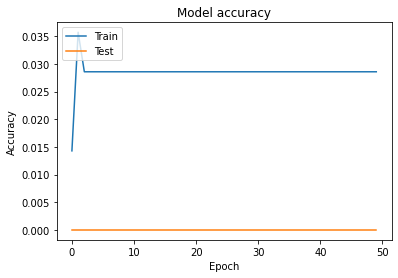

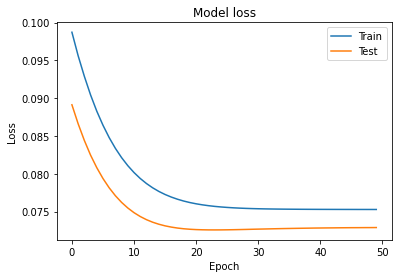

In [37]:
# Training History Visualization

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()